In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import statsmodels.tsa.stattools as sm

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df1 = yf.download("TCS", "2020-01-01", "2024-01-01")
df2 = yf.download("AAPL", "2020-01-01", "2024-01-01")
df3 = yf.download("GOOG", "2020-01-01", "2024-01-01")
df4 = yf.download("NVDA", "2020-01-01", "2024-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


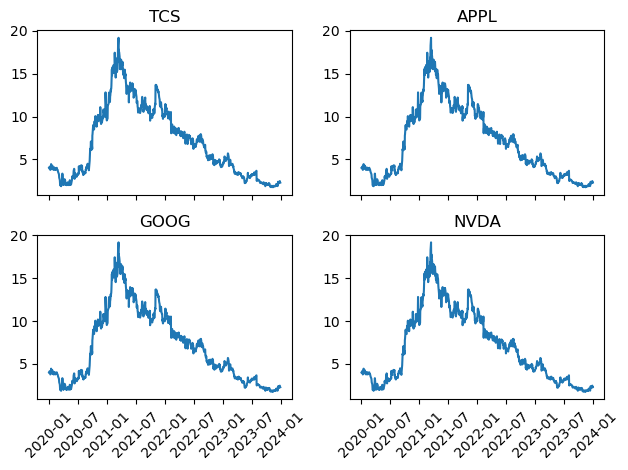

In [3]:
 fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
ax[0,0].plot(df1.index, df1['Adj Close'])
ax[0,0].set_title('TCS')
ax[0,0].tick_params(axis='x', rotation=45)
ax[0,1].plot(df1.index, df1['Adj Close'])
ax[0,1].set_title('APPL')
ax[0,1].tick_params(axis='x', rotation=45)
ax[1,0].plot(df1.index, df1['Adj Close'])
ax[1,0].set_title('GOOG')
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,1].plot(df1.index, df1['Adj Close'])
ax[1,1].set_title('NVDA')
ax[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show();

In [5]:
adf1 = sm.adfuller(df1['Adj Close'], maxlag=1)
adf2 = sm.adfuller(df2['Adj Close'], maxlag=1)
adf3 = sm.adfuller(df3['Adj Close'], maxlag=1)
adf4 = sm.adfuller(df4['Adj Close'], maxlag=1)

isStationary = lambda s, p: print(f'{s} is stationary: p-value {p*100:.2f}%') if p < 0.05 else print(f'{s} is NOT stationary: p-value {p*100:.2f}%')

isStationary('TCS', adf1[1])
isStationary('AAPL', adf2[1])
isStationary('GOOG', adf3[1])
isStationary('NVDA', adf4[1])

TCS is NOT stationary: p-value 67.86%
AAPL is NOT stationary: p-value 52.76%
GOOG is NOT stationary: p-value 52.79%
NVDA is NOT stationary: p-value 96.58%


In [6]:

df5 = yf.download("^GSPC", "2023-01-01", "2024-01-01")
df6 = yf.download("^FTSE", "2023-01-01", "2024-01-01")
df7 = yf.download("^HSI", "2023-01-01", "2024-01-01")
df8 = yf.download("^NSEI", "2023-01-01", "2024-01-01")

adf5 = sm.adfuller(df5['Adj Close'], maxlag=1)
adf6 = sm.adfuller(df6['Adj Close'], maxlag=1)
adf7 = sm.adfuller(df7['Adj Close'], maxlag=1)
adf8 = sm.adfuller(df8['Adj Close'], maxlag=1)

isStationary('S&P500 Index', adf5[1])
isStationary('FTSE Index', adf6[1])
isStationary('Hang Seng Index', adf7[1])
isStationary('Nifty Index', adf8[1])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
S&P500 Index is NOT stationary: p-value 71.77%
FTSE Index is NOT stationary: p-value 15.10%
Hang Seng Index is NOT stationary: p-value 68.07%
Nifty Index is NOT stationary: p-value 98.78%


In [ ]:

python
Copy code
# Corrected code
  # Corrected ticker symbol and date format
  # Changed sm.adfuller to sm.tsa.adfuller


In [22]:
df9 = yf.download("GOLD", "2020-01-01", "2024-01-01")
adf9 = sm.adfuller(df9['Adj Close'], maxlag=1)
isStationary('GOLD', adf9[1])

[*********************100%%**********************]  1 of 1 completed
GOLD is NOT stationary: p-value 17.27%


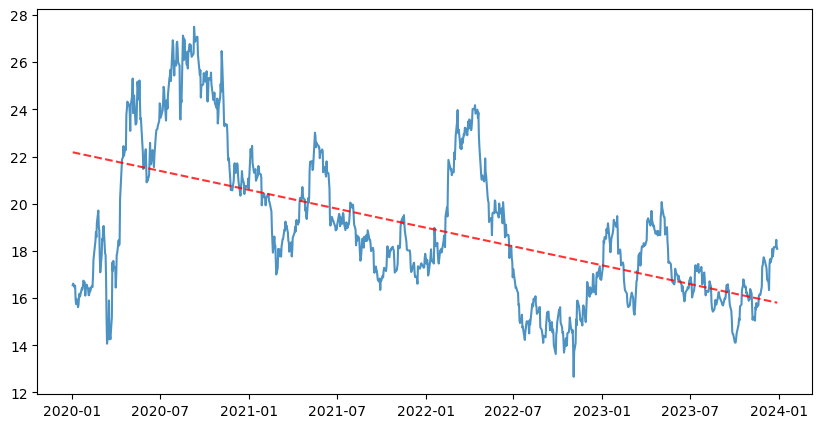

In [23]:
x = mdates.date2num(df9.index.to_pydatetime())

m, c = np.polyfit(x, df9['Adj Close'], 1)
y1 = m*x + c

fig1 = plt.figure(figsize=(10,5))
plt.plot(df9.index, df9['Adj Close'], alpha=0.8)
plt.plot(df9.index, y1, alpha=0.8, color='red', linestyle ='--')
plt.show();